In [ ]:
!gdown 1QLCfoO_2In5AIJtMzvVEmB-_TnUwtSUb
# !gdown 1aPVVxvG-9laG_8Bwhz_gqLMNnMUhKzVL
!unzip -q dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1QLCfoO_2In5AIJtMzvVEmB-_TnUwtSUb
From (redirected): https://drive.google.com/uc?id=1QLCfoO_2In5AIJtMzvVEmB-_TnUwtSUb&confirm=t&uuid=b61e5b25-cc73-4003-9837-d3ca7a5bd827
To: /content/dataset.zip
100% 2.48G/2.48G [00:33<00:00, 73.6MB/s]


In [ ]:
# !unzip -q '/content/VITS-February-06-2024_11+33PM-0000000.zip'

In [ ]:
!git clone https://github.com/coqui-ai/TTS

Cloning into 'TTS'...
remote: Enumerating objects: 32844, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 32844 (delta 21), reused 29 (delta 16), pack-reused 32804
Receiving objects: 100% (32844/32844), 166.21 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (23813/23813), done.


In [ ]:
!pip install -e TTS[all,dev,notebooks]  # Select the relevant extras

Obtaining file:///content/TTS
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) .

In [ ]:
!pip install fastapi kaleido python-multipart uvicorn bokeh==3.3.0
!pip install numpy -U

In [ ]:
!sudo apt-get install espeak-ng
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,525 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpcaudio0 amd64 1.1-6build2 [8,956 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 espeak-ng-data amd64 1.50+dfsg-10 [3,956 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libespeak-ng1 amd64 1.50+dfsg-10 [207 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-ng amd64 1.50+dfsg-10 [343 kB]
Fetched 4,525 kB in 1s (4,891 k

In [ ]:
from shutil import which
print(which('espeak'))
print(which('espeak-ng'))

/usr/bin/espeak
/usr/bin/espeak-ng


In [ ]:
import os
import gdown
import pandas as pd
import soundfile as sf
import shutil
import bangla


try:
  from TTS.utils.synthesizer import Synthesizer
except:
  print("coundn't import TTS synthesizer,trying again!")

import TTS

import time
from typing import List

import numpy as np
import pysbd
import torch

from TTS.config import load_config
from TTS.tts.models import setup_model as setup_tts_model

from TTS.tts.utils.synthesis import synthesis, transfer_voice, trim_silence
from TTS.utils.audio import AudioProcessor
from TTS.vocoder.models import setup_model as setup_vocoder_model
from TTS.vocoder.utils.generic_utils import interpolate_vocoder_input

In [ ]:
!nvidia-smi
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import torch
# Trainer: Where the ✨️ happens.
# TrainingArgs: Defines the set of arguments of the Trainer.
from trainer import Trainer, TrainerArgs

from TTS.tts.configs.vits_config import VitsConfig
from TTS.tts.models.vits import Vits, VitsAudioConfig
from TTS.tts.utils.text.phonemizers import ESpeak
# BaseDatasetConfig: defines name, formatter and path of the dataset.


from TTS.tts.utils.text.tokenizer import TTSTokenizer
from TTS.utils.audio import AudioProcessor

from TTS.tts.configs.shared_configs import BaseDatasetConfig,BaseAudioConfig,CharactersConfig
#from TTS.configs import BaseDatasetConfig,BaseAudioConfig,CharactersConfig#GlowTTSConfig
from TTS.tts.datasets import load_tts_samples
from TTS.tts.utils.speakers import SpeakerManager

from TTS.config import load_config

from trainer import Trainer, TrainerArgs

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
male = True
pretrained = False

pretrained_path = ''
if(pretrained):
    pretrained_path = '/content/VITS-February-06-2024_11+33PM-0000000'
if(male):
    meta_file = 'content/iitm_bangla_tts/comprehensive_bangla_tts/male/mono/metadata_male.txt'
    root_path = 'content/iitm_bangla_tts/comprehensive_bangla_tts/male/mono'
else:
    meta_file = 'content/iitm_bangla_tts/comprehensive_bangla_tts/female/mono/metadata_female.txt'
    root_path = 'content/iitm_bangla_tts/comprehensive_bangla_tts/female/mono'

def formatter(root_path, meta_file, **kwargs):  # pylint: disable=unused-argument
    """Normalizes the LJSpeech meta data file to TTS format
    https://keithito.com/LJ-Speech-Dataset/"""
    txt_file = meta_file
    items = []
    speaker_name = "ljspeech"
    with open(txt_file, "r", encoding="utf-8") as ttf:
        for line in ttf:
            cols = line.split("|")
            wav_file = os.path.join(root_path, "wav", cols[0] + ".wav")
            try:
                text = cols[1]
            except:
                print("not found")

            items.append({"text": text, "audio_file": wav_file, "speaker_name": speaker_name, "root_path": root_path})
    return items


dataset_config = BaseDatasetConfig(
     meta_file_train=meta_file, path=os.path.join(root_path, "")
)

In [ ]:
print(dataset_config)

BaseDatasetConfig(formatter='', dataset_name='', path='content/iitm_bangla_tts/comprehensive_bangla_tts/male/mono/', meta_file_train='content/iitm_bangla_tts/comprehensive_bangla_tts/male/mono/metadata_male.txt', ignored_speakers=None, language='', phonemizer='', meta_file_val='', meta_file_attn_mask='')


In [ ]:
characters_config = CharactersConfig(
  pad = '<PAD>',
  eos = '।', #'<EOS>', #'।',
  bos = '<BOS>',# None,
  blank = '<BLNK>',
  characters =  "তট৫ভিঐঋখঊড়ইজমএেঘঙসীঢ়হঞ‘ঈকণ৬ঁৗশঢঠ\u200c১্২৮দৃঔগও—ছউংবৈঝাযফ\u200dচরষঅৌৎথড়৪ধ০ুূ৩আঃপয়’নলো",
  phonemes =  "ˌamɾʃˈonbŋlitjʰɔdkpeɟːfɡuhrʈæsʒɖwəcã",
  punctuations = "-!,|.? ",
)

In [ ]:
output_path = ''

audio_config = VitsAudioConfig(
    sample_rate=22050,
    win_length=1024,
    hop_length=256,
    num_mels=80,
    mel_fmin=0,
    mel_fmax=None
)

config = VitsConfig(
    audio=audio_config,
    run_name="VITS",
    batch_size=8,
    eval_batch_size=8,
    batch_group_size=0,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=-1,
    epochs=1,
    phonemizer='espeak',
    text_cleaner='phoneme_cleaners',
    use_phonemes=True,
    phoneme_language="bn",
    phoneme_cache_path=os.path.join(output_path, "phoneme_cache"),
    compute_input_seq_cache=True,
    add_blank=True,
    use_language_weighted_sampler = True,
    print_step=50,
    print_eval=False,
    mixed_precision=False,
    output_path=output_path,
    datasets=[dataset_config],
    characters = characters_config,
    save_step=1000,
    cudnn_benchmark=True,
    test_sentences = [
        'আমার   সোনার বাংলা, আমি তোমায় ভালোবাসি।',
        'চিরদিন   তোমার আকাশ, তোমার বাতাস, আমার প্রাণে বাজায় বাঁশি',
        'ও মা,   ফাগুনে তোর আমের বনে ঘ্রাণে পাগল করে,মরি হায়, হায় রে।'
    ]
)

In [ ]:
ap = AudioProcessor.init_from_config(config)

tokenizer, config = TTSTokenizer.init_from_config(config)

 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


# Previous Training code for VITS

In [ ]:
# load training samples
train_samples, eval_samples = load_tts_samples(dataset_config,formatter=formatter, eval_split=True)

 | > Found 6187 files in /content/content/iitm_bangla_tts/comprehensive_bangla_tts/male/mono


In [ ]:
print(len(train_samples),len(eval_samples))

6126 61


In [ ]:
model = Vits(config, ap, tokenizer, speaker_manager=None)

In [ ]:
trainer = Trainer(
    TrainerArgs(continue_path = pretrained_path),
    config,
    output_path,
    model=model,
    train_samples=train_samples,
    eval_samples=eval_samples
)

 > Training Environment:
 | > Backend: Torch
 | > Mixed precision: False
 | > Precision: float32
 | > Current device: 0
 | > Num. of GPUs: 1
 | > Num. of CPUs: 2
 | > Num. of Torch Threads: 1
 | > Torch seed: 54321
 | > Torch CUDNN: True
 | > Torch CUDNN deterministic: False
 | > Torch CUDNN benchmark: True
 | > Torch TF32 MatMul: False
 > Start Tensorboard: tensorboard --logdir=VITS-February-20-2024_08+40PM-0000000

 > Model has 83043052 parameters


In [ ]:
trainer.config.test_sentences = [
        'আমার সোনার বাংলা, আমি তোমায় ভালোবাসি।',
        'চিরদিন তোমার আকাশ, তোমার বাতাস, আমার প্রাণে বাজায় বাঁশি',
        'ও মা, ফাগুনে তোর আমের বনে ঘ্রাণে পাগল করে,মরি হায়, হায় রে।'
    ]

In [ ]:
%%time

trainer.fit()


 > EPOCH: 0/1
 --> VITS-February-20-2024_08+40PM-0000000


[*] Pre-computing phonemes...


100%|██████████| 6126/6126 [03:14<00:00, 31.47it/s]




> DataLoader initialization
| > Tokenizer:
	| > add_blank: True
	| > use_eos_bos: False
	| > use_phonemes: True
	| > phonemizer:
		| > phoneme language: bn
		| > phoneme backend: espeak
| > Number of instances : 6126


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

 > TRAINING (2024-02-20 20:44:11) 


 | > Preprocessing samples
 | > Max text length: 114
 | > Min text length: 16
 | > Avg text length: 64.72233104799217
 | 
 | > Max audio length: 276735
 | > Min audio length: 49452
 | > Avg audio length: 129085.73326803787
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.


/usr/local/lib/python3.10/dist-packages/torch/functional.py:650: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:863.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]

   --> TIME: 2024-02-20 20:44:31 -- STEP: 0/766 -- GLOBAL_STEP: 0
     | > loss_disc: 6.075153350830078  (6.075153350830078)
     | > loss_disc_real_0: 0.9809607267379761  (0.9809607267379761)
     | > loss_disc_real_1: 1.0514799356460571  (1.0514799356460571)
     | > loss_disc_real_2: 1.0036823749542236  (1.0036823749542236)
     | > loss_disc_real_3: 1.0278592109680176  (1.0278592109680176)
     | > loss_disc_real_4: 1.0030947923660278  (1.0030947923660278)
     | > loss_disc_re



> DataLoader initialization
| > Tokenizer:
	| > add_blank: True
	| > use_eos_bos: False
	| > use_phonemes: True
	| > phonemizer:
		| > phoneme language: bn
		| > phoneme backend: espeak
| > Number of instances : 61
 | > Preprocessing samples
 | > Max text length: 92
 | > Min text length: 40
 | > Avg text length: 64.52459016393442
 | 
 | > Max audio length: 171352
 | > Min audio length: 68502
 | > Avg audio length: 126210.45901639345
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.
 | > Synthesizing test sentences.


/content/TTS/TTS/tts/models/vits.py:1455: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  test_figures["{}-alignment".format(idx)] = plot_alignment(alignment.T, output_fig=False)

  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.005615336554391044 (+0)
     | > avg_loss_disc: 2.6252937657492503 (+0)
     | > avg_loss_disc_real_0: 0.15372279925005777 (+0)
     | > avg_loss_disc_real_1: 0.21349643809454782 (+0)
     | > avg_loss_disc_real_2: 0.23961559789521353 (+0)
     | > avg_loss_disc_real_3: 0.2856713150228773 (+0)
     | > avg_loss_disc_real_4: 0.3165540610040937 (+0)
     | > avg_loss_disc_real_5: 0.3204014301300049 (+0)
     | > avg_loss_0: 2.6252937657492503 (+0)
   

CPU times: user 13min 40s, sys: 1min 12s, total: 14min 52s
Wall time: 18min 36s


# Text to Phoneme conversion

In [ ]:
# Load config.json properties
CONFIG = config

# Load some properties from config.json
CONFIG_METADATA = load_tts_samples(dataset_config, formatter=formatter)[0]
CONFIG_METADATA = CONFIG_METADATA
CONFIG_DATASET = CONFIG.datasets[0]
CONFIG_PHONEME_LANGUAGE = CONFIG.phoneme_language
CONFIG_TEXT_CLEANER = CONFIG.text_cleaner
CONFIG_ENABLE_EOS_BOS_CHARS = CONFIG.enable_eos_bos_chars

# Will be printed on generated output graph
CONFIG_RUN_NAME = CONFIG.run_name
CONFIG_RUN_DESC = CONFIG.run_description

# Needed to convert text to phonemes and phonemes to ids
tokenizer, config = TTSTokenizer.init_from_config(CONFIG)

 | > Found 6187 files in /content/content/iitm_bangla_tts/comprehensive_bangla_tts/male/mono


In [ ]:
text = "ও মা, ফাগুনে তোর আমের বনে ঘ্রাণে পাগল করে,মরি হায়, হায় রে।".rstrip('\n')
text

'ও মা, ফাগুনে তোর আমের বনে ঘ্রাণে পাগল করে,মরি হায়, হায় রে।'

In [ ]:
seq = tokenizer.text_to_ids(text)
tokenizer.ids_to_text(seq)

'<BLNK>o<BLNK>ː<BLNK> <BLNK>m<BLNK>ˈ<BLNK>a<BLNK>,<BLNK> <BLNK>f<BLNK>ˈ<BLNK>a<BLNK>ɡ<BLNK>u<BLNK>n<BLNK>ˌ<BLNK>e<BLNK> <BLNK>t<BLNK>ˌ<BLNK>o<BLNK>ɾ<BLNK> <BLNK>ˈ<BLNK>a<BLNK>m<BLNK>e<BLNK>ɾ<BLNK> <BLNK>b<BLNK>ˈ<BLNK>ɔ<BLNK>n<BLNK>e<BLNK> <BLNK>ɡ<BLNK>ʰ<BLNK>ɾ<BLNK>ˈ<BLNK>a<BLNK>n<BLNK>e<BLNK> <BLNK>p<BLNK>ˈ<BLNK>a<BLNK>ɡ<BLNK>ɔ<BLNK>l<BLNK> <BLNK>k<BLNK>ˈ<BLNK>ɔ<BLNK>ɾ<BLNK>e<BLNK>,<BLNK>m<BLNK>ˈ<BLNK>o<BLNK>ɾ<BLNK>i<BLNK> <BLNK>h<BLNK>ˈ<BLNK>a<BLNK>j<BLNK>o<BLNK>,<BLNK> <BLNK>h<BLNK>ˈ<BLNK>a<BLNK>j<BLNK>o<BLNK> <BLNK>ɾ<BLNK>ˈ<BLNK>e<BLNK>'

In [ ]:
# print some debug information on loaded config values
print(" > Run name: " + CONFIG_RUN_NAME + " (" + CONFIG_RUN_DESC + ")")
print(" > Dataset files: " + str(len(CONFIG_METADATA)))
print(" > Phoneme language: " + CONFIG_PHONEME_LANGUAGE)
print(" > Used text cleaner: " + str(CONFIG_TEXT_CLEANER))
print(" > Enable eos bos chars: " + str(CONFIG_ENABLE_EOS_BOS_CHARS))

 > Run name: VITS (🐸Coqui trainer run.)
 > Dataset files: 6126
 > Phoneme language: bn
 > Used text cleaner: phoneme_cleaners
 > Enable eos bos chars: False


In [ ]:
CHARS_TO_REMOVE = ".,:!?'"

def get_phoneme_from_sequence(text):
    temp_list = []
    if len(text["text"]) > 0:
        #temp_text = text[0].rstrip('\n')
        temp_text = text["text"].rstrip('\n')
        for rm_bad_chars in CHARS_TO_REMOVE:
            temp_text = temp_text.replace(rm_bad_chars,"")
        seq = tokenizer.text_to_ids(temp_text)
        text = tokenizer.ids_to_text(seq)
        # text = text.replace(" ","")
        text = text.replace("<BLNK>","")
        temp_list.append(text)
    return temp_list

In [ ]:
from tqdm import tqdm
from matplotlib import pylab as plt
from multiprocessing import Pool, cpu_count

# extra imports that might not be included in requirements.txt
import collections
import operator

%matplotlib inline

# Get phonemes from metadata
phonemes = []

with Pool(cpu_count()-1) as p:

    phonemes = list(tqdm(p.imap(get_phoneme_from_sequence, CONFIG_METADATA), total=len(CONFIG_METADATA)))
    phonemes = [i for sub in phonemes for i in sub]

100%|██████████| 6126/6126 [01:44<00:00, 58.53it/s]


In [ ]:
phonemes[:5]

['ʃˈɔkal ʃˈar.e nˈɔʈajˌo lˈiluˌa ɾˈel ˈoːaɾkˌɔʃɔpˌepɔɾˌitæktˌo pˈaʈeɾ stˈupeˌaɡun lˈaɡe',
 'ʃˈekʰanˌɔkaɾ ˈækʈaː bˈɔr. ˈɔŋʃɔ dˈineɾ pˈɔɾ dˈin mˈɔɾɔnˌɔfãd hˈɔe ɾˈoetʃʰˌe',
 'bʰˈoɾtiɾ nˈunætˌɔm ʃˈikʰkʰaɡˌɔto dʒˈoɡætˌa dʰˈɔɾa hˈɔetʃʰˌe mˈadʰæmˌik pˈaʃ',
 'pˈaɾbɔtˌiduɡɡˌa bʰˈir. ˌaɾ ʈʰˈelaʈʰˌeliɾ ˈapæjˌɔne dˈɔɾɔdˌɔɾiˌe ɡʰˈamɔtʃʰˌen pˈænɖelˌe',
 'bˈiddʒut bˈibʰɾaʈˌeɔtˌiʃʈʰɔ bˈaʃindˌaɾabˌiddʒut pˈɔrʃɔdˌeɾ bˈaɟaɾˌɔʃaˌu kˈaɾælˌɔjo bʰˈaŋɡɔtʃˌuɾ kˈɔɾɔl']

In [ ]:
CONFIG_METADATA[0]['text']

'সকাল সাড়ে নটায় লিলুয়া রেল ওয়ার্কশপে,পরিত্যক্ত পাটের স্তুপে,আগুন লাগে\n'

In [ ]:
texts = []
for d in CONFIG_METADATA:
  texts.append(d['text'])

In [ ]:
import collections
freq =  {}
for text in texts:
    # Remove newline character
    text = text.strip()

    # Count character frequencies
    char_counts = collections.Counter(text)

    # Print character frequencies
    for char, count in char_counts.items():
      if char in freq.keys():
        freq[char] += count
      else:
        freq[char] = count

In [ ]:
unique_chars = list(freq.keys())
unique_chars

['স',
 'ক',
 'া',
 'ল',
 ' ',
 'ড়',
 'ে',
 'ন',
 'ট',
 'য়',
 'ি',
 'ু',
 'র',
 'ও',
 '্',
 'শ',
 'প',
 ',',
 'ত',
 'য',
 'আ',
 'গ',
 'খ',
 'এ',
 'ব',
 'অ',
 'ং',
 'দ',
 'ম',
 'ণ',
 'ফ',
 'ঁ',
 'হ',
 'ছ',
 'ভ',
 'ূ',
 'ষ',
 'ো',
 'ধ',
 'ী',
 'ঠ',
 'ঘ',
 'ড',
 'জ',
 'উ',
 'ঙ',
 'চ',
 'ই',
 'ঝ',
 'থ',
 'ঞ',
 'ৈ',
 'ৃ',
 'ৌ',
 'ঃ',
 'ৗ',
 'ঢ',
 'ঢ়',
 '\u200c',
 'ঐ',
 'ঋ',
 '়',
 '।',
 'ঔ',
 'ঈ',
 '.',
 'ৎ',
 '\u200d',
 'ঊ',
 '-',
 '?',
 '!']

In [ ]:
unique_chars_string = " ".join(unique_chars)
unique_chars_string

'স ক া ল   ড় ে ন ট য় ি ু র ও ্ শ প , ত য আ গ খ এ ব অ ং দ ম ণ ফ ঁ হ ছ ভ ূ ষ ো ধ ী ঠ ঘ ড জ উ ঙ চ ই ঝ থ ঞ ৈ ৃ ৌ ঃ ৗ ঢ ঢ় \u200c ঐ ঋ ় । ঔ ঈ . ৎ \u200d ঊ - ? !'

In [ ]:
ph = []
for t in unique_chars:
  ph.append(get_phoneme_from_sequence({"text": t}))

In [ ]:
e = ESpeak("bn")

In [ ]:
texts[:4]

['সকাল সাড়ে নটায় লিলুয়া রেল ওয়ার্কশপে,পরিত্যক্ত পাটের স্তুপে,আগুন লাগে\n',
 'সেখানকার একটা বড় অংশ দিনের পর দিন, মরণফাঁদ হয়ে রয়েছে\n',
 'ভর্তির নূন্যতম শিক্ষাগত যোগ্যতা ধরা হয়েছে মাধ্যমিক পাশ\n',
 'পার্বতীদুগ্গা ভিড় আর ঠেলাঠেলির আপ্যায়নে দরদরিয়ে ঘামছেন প্যাণ্ডেলে\n']

In [ ]:
df = pd.DataFrame()

df['Text'] = texts
df['Phoneme'] = phonemes

In [ ]:
df.head()

,Text,Phoneme
0,"সকাল সাড়ে নটায় লিলুয়া রেল ওয়ার্কশপে,পরিত্যক্ত ...",ʃˈɔkal ʃˈar.e nˈɔʈajˌo lˈiluˌa ɾˈel ˈoːaɾkˌɔʃɔ...
1,"সেখানকার একটা বড় অংশ দিনের পর দিন, মরণফাঁদ হয়ে...",ʃˈekʰanˌɔkaɾ ˈækʈaː bˈɔr. ˈɔŋʃɔ dˈineɾ pˈɔɾ dˈ...
2,ভর্তির নূন্যতম শিক্ষাগত যোগ্যতা ধরা হয়েছে মাধ্...,bʰˈoɾtiɾ nˈunætˌɔm ʃˈikʰkʰaɡˌɔto dʒˈoɡætˌa dʰˈ...
3,পার্বতীদুগ্গা ভিড় আর ঠেলাঠেলির আপ্যায়নে দরদরিয়...,pˈaɾbɔtˌiduɡɡˌa bʰˈir. ˌaɾ ʈʰˈelaʈʰˌeliɾ ˈapæj...
4,"বিদ্যুত্ বিভ্রাটে,অতিষ্ঠ বাসিন্দারা,বিদ্যুত্ প...",bˈiddʒut bˈibʰɾaʈˌeɔtˌiʃʈʰɔ bˈaʃindˌaɾabˌiddʒu...


In [ ]:
df.to_csv('text-phoneme.csv', index=False)

In [ ]:
s = ""
phonemeString = s.join(phonemes)


d = {}
collections._count_elements(d, phonemeString)
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))

# remove useless keys
sorted_d.pop(' ', None)
sorted_d.pop('ˈ', None)

phonemesSum = len(phonemeString.replace(" ",""))

print("Dataset contains " + str(len(sorted_d)) + " different ipa phonemes.")
print("Dataset consists of " + str(phonemesSum) + " phonemes")

Dataset contains 35 different ipa phonemes.
Dataset consists of 470839 phonemes


In [ ]:
print("5 rarest phonemes")

rareList = dict(sorted(sorted_d.items(), key=operator.itemgetter(1), reverse=False)[:5])
for key, value in rareList.items():
    print(key + " --> " + str(value) + " occurrences")

5 rarest phonemes
ə --> 13 occurrences
c --> 50 occurrences
w --> 409 occurrences
s --> 1172 occurrences
f --> 1440 occurrences


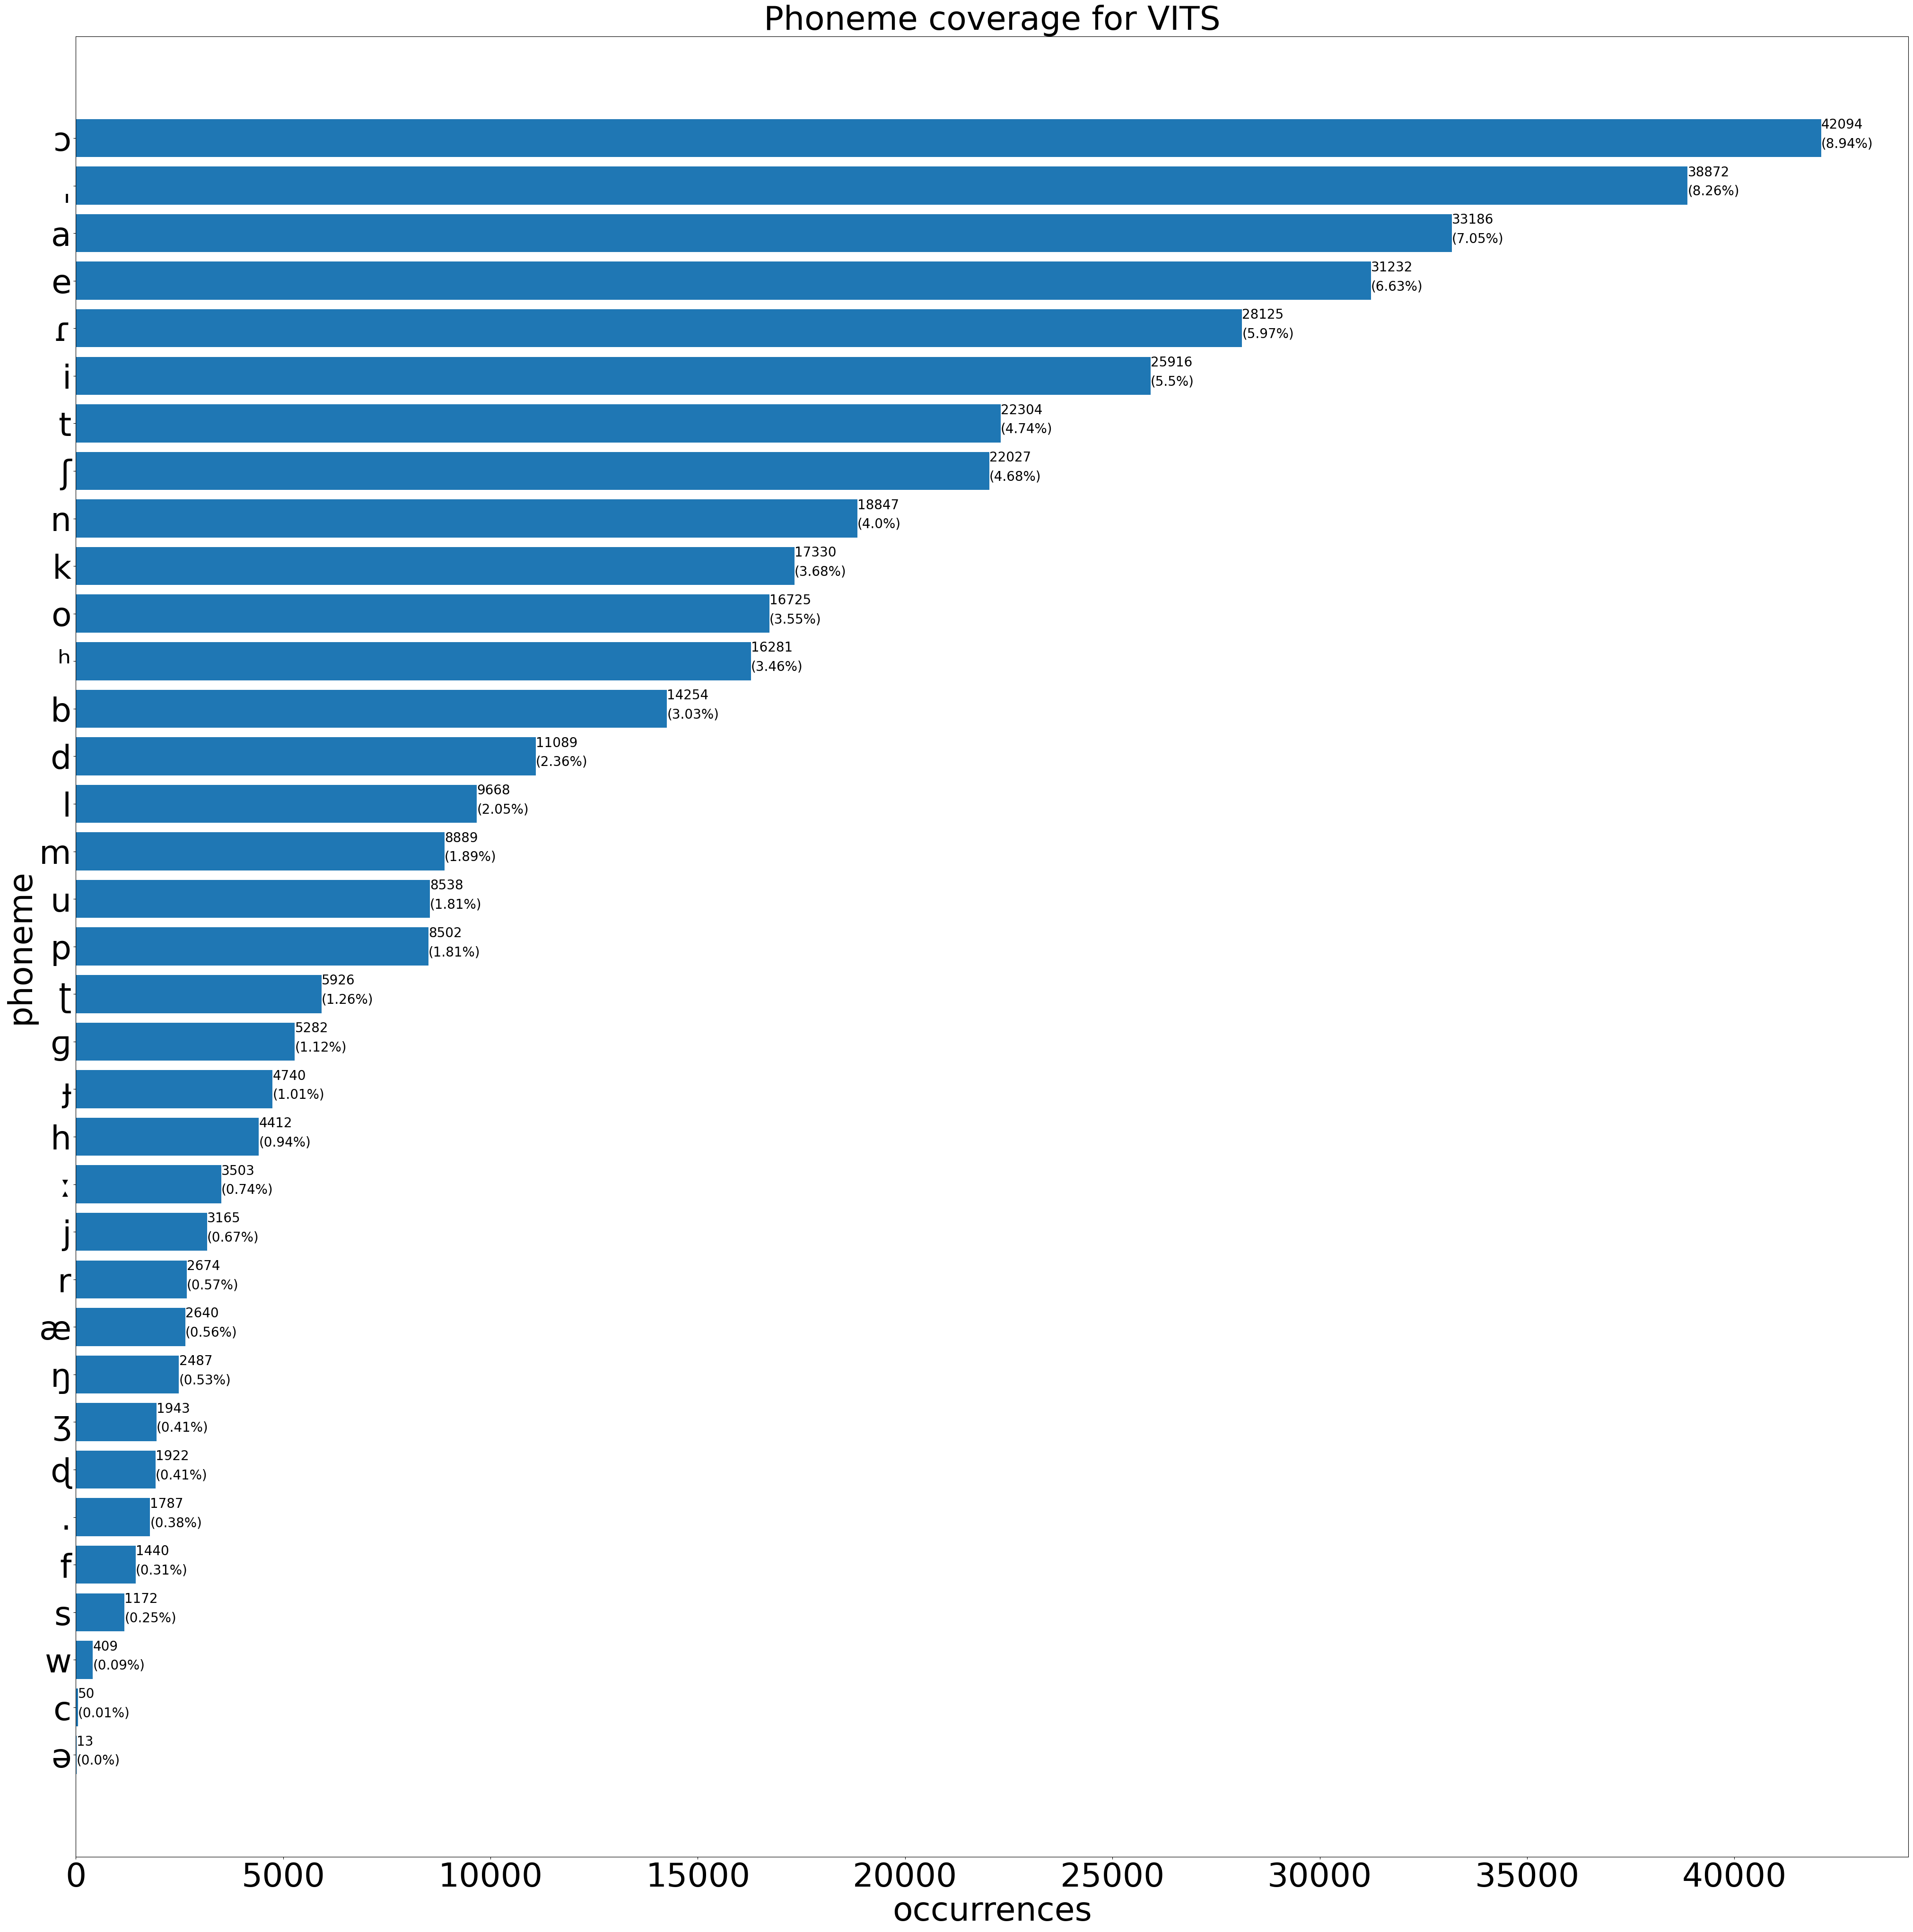

In [ ]:
x = []
y = []

for key, value in sorted_d.items():
    x.append(key)
    y.append(value)

plt.figure(figsize=(50,50))
plt.title("Phoneme coverage for " + CONFIG_RUN_NAME, fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.barh(x,y, align='center', alpha=1.0)
plt.gca().invert_yaxis()
plt.ylabel('phoneme', fontsize=50)
plt.xlabel('occurrences', fontsize=50)

for i, v in enumerate(y):
    plt.text(v + 2, i - .2, str(v), fontsize=20)
    plt.text(v + 2, i + .2, "(" + str(round(100/phonemesSum * v,2)) + "%)", fontsize=20)


plt.show()